In [40]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score

In [41]:
# Load dataset
file_path = '/content/FMCG_data.csv'
data = pd.read_csv(file_path)

In [42]:
print("Dataset Overview:")
data.head()

Dataset Overview:


,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [43]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        25000.000000         25000.000000       25000.000000   
mean             4.089040             0.773680           3.104200   
std              2.606612             1.199449           1.141663   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     25000.000000     25000.000000    25000.000000  25000.000000   
mean       4985.711560        42.418120        0.098160      0.054640   
std        1052.825252        16.064329        0.297537      0.227281   
min        1821.000000        15.000000        0.000000      0.00

In [44]:
# Check missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64


In [45]:
# Handle missing values (mean for numerical, mode for categorical)
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical columns
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = num_imputer.fit_transform(data[[col]]).ravel()

# Impute categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col] = cat_imputer.fit_transform(data[[col]]).ravel()


In [46]:
# Encode categorical features
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

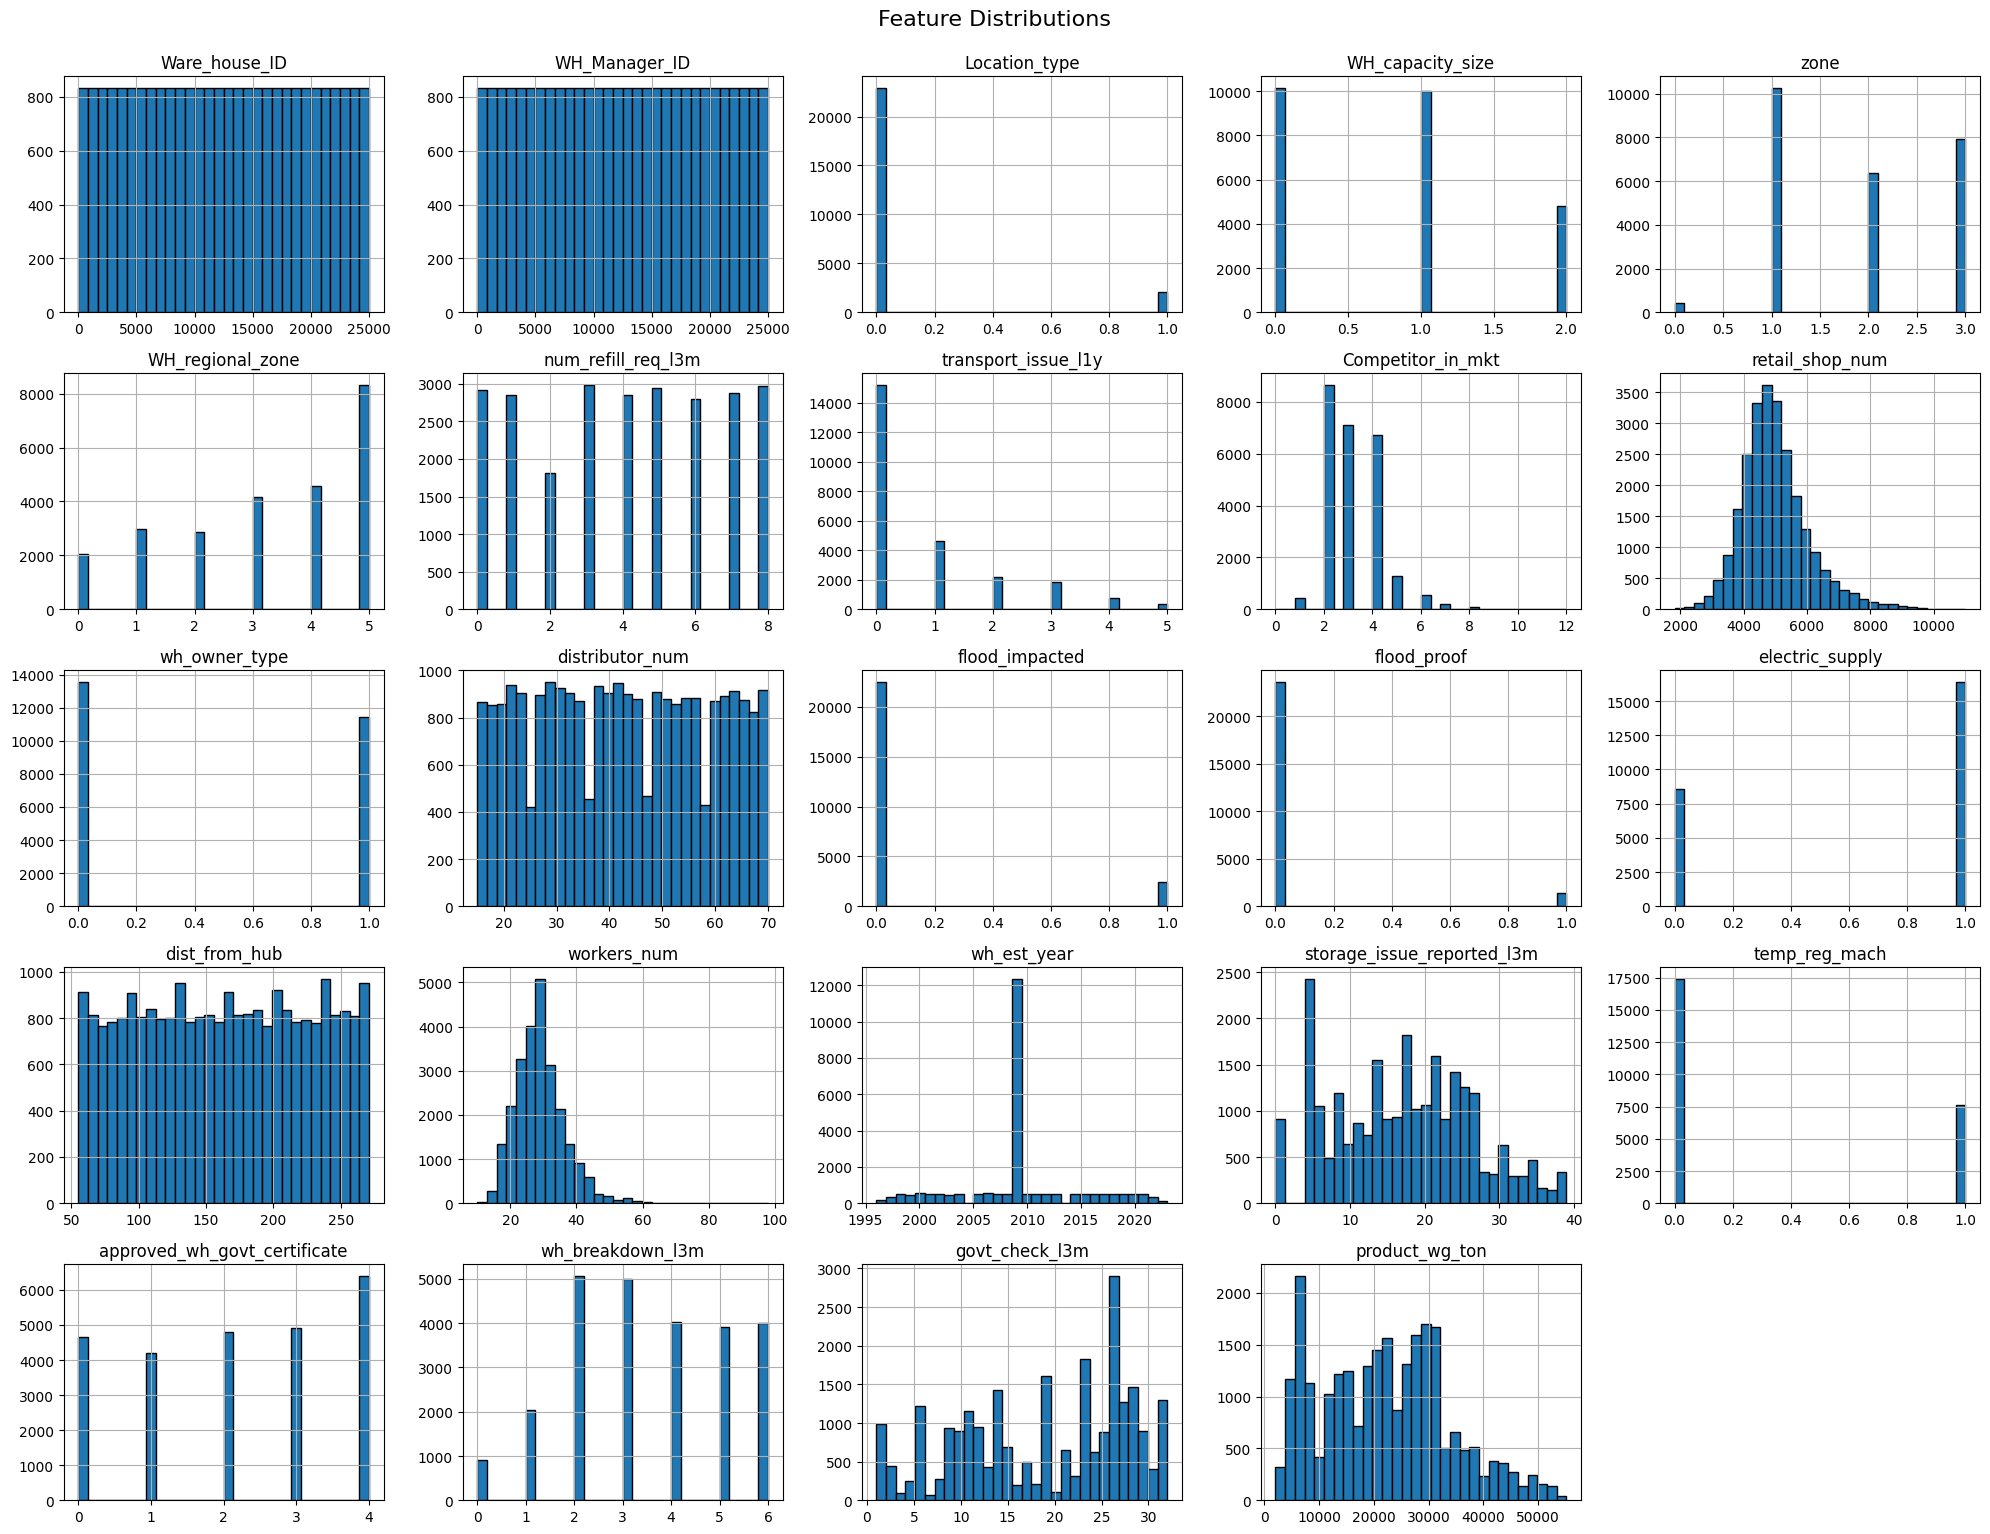

In [47]:
# Plot feature distributions
data.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.tight_layout()
plt.suptitle("Feature Distributions", fontsize=16, y=1.02)
plt.show()

<ipython-input-55-c8c246a928e3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Location_type', data=data, palette="viridis")


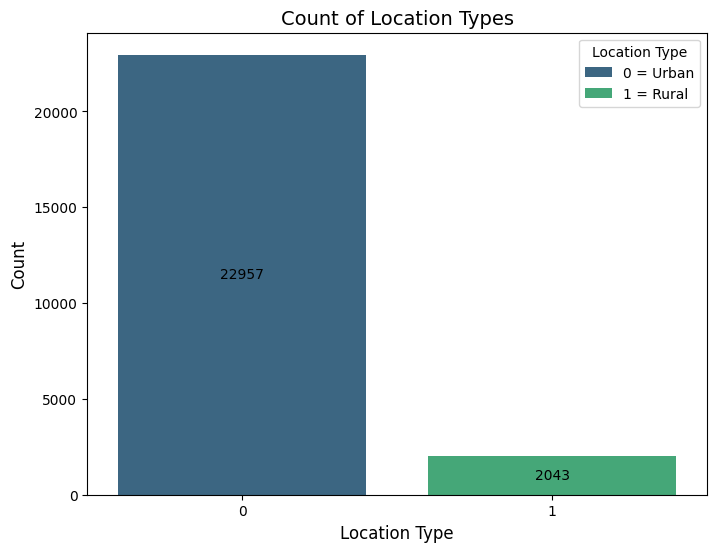

In [55]:
# Define the mapping for location types
location_labels = {0: "Urban", 1: "Rural"}

# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Location_type', data=data, palette="viridis")

# Add counts to the center of each bar
for bar in ax.patches:
    count = int(bar.get_height())
    ax.annotate(f"{count}",
                (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                ha='center', va='center', fontsize=10, color='black')
# Add legend for labels
legend_labels = [f"{key} = {value}" for key, value in location_labels.items()]
plt.legend(legend_labels, title="Location Type", loc="upper right")

# Set titles and labels
plt.title("Count of Location Types", fontsize=14)
plt.xlabel("Location Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

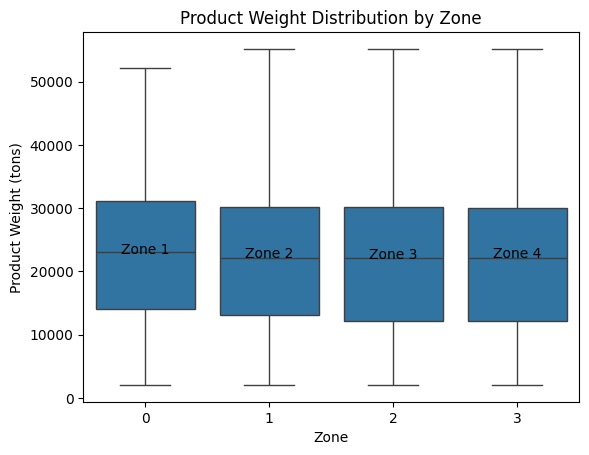

In [56]:
sns.boxplot(x='zone', y='product_wg_ton', data=data)
plt.title("Product Weight Distribution by Zone")
plt.xlabel("Zone")
plt.ylabel("Product Weight (tons)")
zone_labels = {0: "Zone 1", 1: "Zone 2", 2: "Zone 3", 3: "Zone 4", 4: "Zone 5"}
for zone, label in zone_labels.items():
    plt.text(zone, data[data['zone'] == zone]['product_wg_ton'].mean(), label, ha='center', fontsize=10, color='black')
plt.show()

In [60]:
# ML Preparation
X = data.drop(['product_wg_ton', 'Ware_house_ID'], axis=1)  # Drop target and ID
y = data['product_wg_ton']  # Target variable for regression

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf_regressor.predict(X_test)
print("\nRegression Evaluation:")
print(f"R² Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")


Regression Evaluation:
R² Score: 0.9942600645051545
Mean Squared Error: 768002.55494986


In [63]:
# Classification
y_class = data['approved_wh_govt_certificate']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_cls, y_train_cls)

y_pred_cls = rf_classifier.predict(X_test_cls)
print("\nClassification Evaluation:")
print(classification_report(y_test_cls, y_pred_cls))


Classification Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       912
           1       1.00      1.00      1.00       874
           2       1.00      1.00      1.00       944
           3       1.00      1.00      1.00       973
           4       1.00      1.00      1.00      1297

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [64]:
import joblib
# Save the trained model to a file
model_filename = 'rf_regressor_model.pkl'
joblib.dump(rf_regressor, model_filename)
print(f"Model saved to {model_filename}")

Model saved to rf_regressor_model.pkl
